In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.naive_bayes import GaussianNB, BernoulliNB, CategoricalNB
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, confusion_matrix,\
 f1_score, recall_score, precision_score, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay


from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv




%precision %.7g
%matplotlib inline

# Explore

In [2]:
spam = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/spam.csv")

spam.head()

,is_spam,viagra,love,dollar,buy
0,1,0,0,0,0
1,1,0,0,1,1
2,0,0,0,0,0
3,1,1,0,1,1
4,1,1,0,0,0


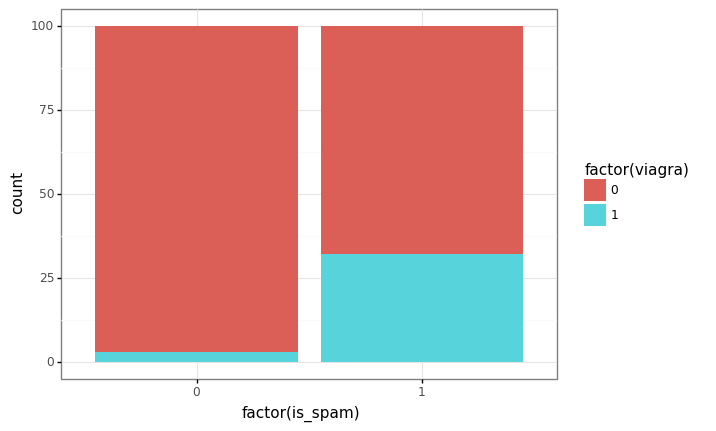

<ggplot: (287051384)>

In [4]:
(ggplot(spam, aes(x = "factor(is_spam)", fill = "factor(viagra)")) + geom_bar() + theme_bw())

# Build and Evaluate Model

Test Acc: 0.905
Train Acc: 0.905


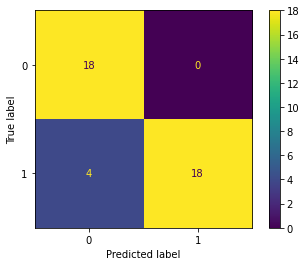

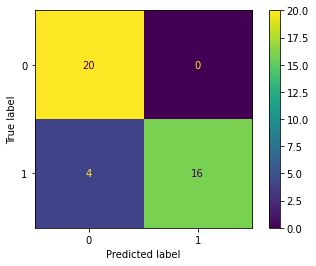

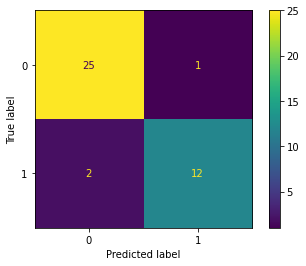

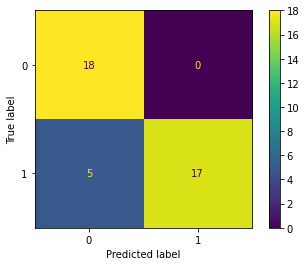

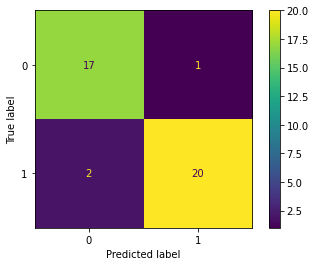

In [5]:
X = spam[["viagra", "love", "dollar", "buy"]]
y = spam["is_spam"]

kf = KFold(n_splits = 5)

acc_train = []
acc_test = []

nb = BernoulliNB()

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    nb.fit(X_train, y_train)
    
    acc_train.append(accuracy_score(y_train, nb.predict(X_train)))
    acc_test.append(accuracy_score(y_test, nb.predict(X_test)))
    
    ConfusionMatrixDisplay.from_predictions(y_test, nb.predict(X_test))
    
print("Test Acc: " + str(np.mean(acc_test)))
print("Train Acc: " + str(np.mean(acc_train)))

In [6]:
# Let's check by hand

# Hello,
# I hope you are well. Honestly I am doing super well! I have the urge to buy something crazy.
# Maybe one of those giant bean bags from the mall. A love sac. Well. Another day, another dollar.
# Sincerely,
# Dad

# 0,1,1,1
nb.predict(np.array([0,1,1,1]).reshape(1,-1))

array([1])

In [7]:
spam.groupby("is_spam").mean()

,viagra,love,dollar,buy
is_spam,,,,
0,0.03,0.36,0.02,0.02
1,0.32,0.05,0.83,0.74


In [8]:
# probabilities by hand 
spam_score = (1-0.32)*(0.05)*(0.83)*(0.74)*0.5
ham_score = (1-0.03)*(0.36)*(0.02)*(0.02)*0.5

print("Spam", f"{spam_score:.9f}")
print("Ham", f"{ham_score:.9f}")

Spam 0.010441400
Ham 0.000069840


# NB in sklearn
In sklearn there are 3 main functions you can use to perform Naive Bayes:

* `GaussianNB()`: Assumes that features follow a Normal/Gaussian Distribution.
* `BernoulliNB()`: Assumes features are binary (0/1)
* `CategoricalNB()`: Assumes features are discrete categories (can have more than 2 categories)

This means that if your features are continuous you'd use `GaussianNB()`, if they are only binary, use `BernoulliNB()` and if they are only Categorical, use `CategoricalNB()`. In practice, we'll often use either `GaussianNB()` or `CategoricalNB()` (since `CategoricalNB()` can also handle it when we have binary + categorical).

This means that computationally, we cannot have both continuous + categorical predictors in one sklearn NB model. (There are workarounds for this: see [here](https://stackoverflow.com/questions/14254203/mixing-categorial-and-continuous-data-in-naive-bayes-classifier-using-scikit-lea), but for now, we'll be using only one or the other).


In [11]:
# generate fake continuous predictors
n = 1000
outcome = np.random.binomial(1,p = 0.6, size = n)
x1 = np.random.normal(loc = outcome*0.5 , scale = 1, size = n)
x2 = np.random.normal(loc = outcome*-0.01 , scale = 1, size = n)
x3 = np.random.normal(loc = 0 , scale = 1, size = n) #no relationship to outcome


In [12]:
df = pd.DataFrame({"y": outcome,
                  "x1": x1,
                  "x2": x2,
                  "x3": x3,})

df.head()

,y,x1,x2,x3
0,0,-0.639415,1.934902,-0.842697
1,0,-0.562001,-0.779741,-0.432348
2,0,1.099570,-0.237491,-0.349029
3,0,0.684867,-0.939055,0.777900
4,0,-0.710975,-0.193240,0.071525


Test Acc: 0.628
Train Acc: 0.635


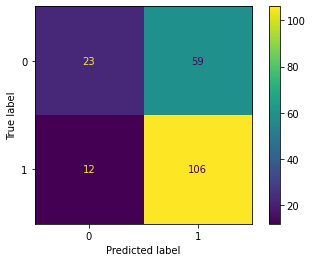

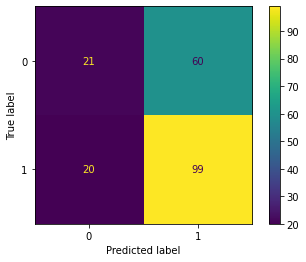

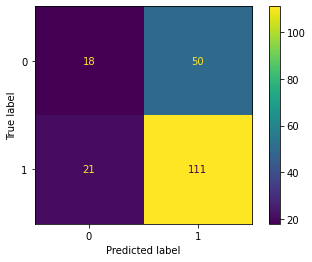

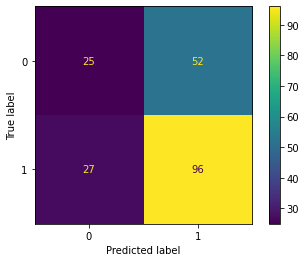

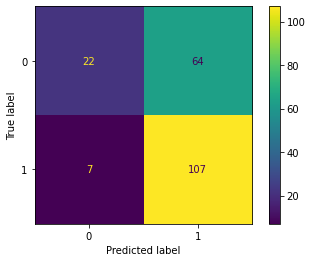

In [15]:
X = df[["x1", "x2", "x3"]]
y = df["y"]

kf = KFold(n_splits = 5)

nb2 = GaussianNB()

acc_train = []
acc_test = []

for train,test in kf.split(X):
    X_train = X.iloc[train]
    X_test = X.iloc[test]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    X_train = z.fit_transform(X_train)
    X_test = z.transform(X_test)
    
    nb2.fit(X_train,y_train)
    
    acc_test.append(accuracy_score(y_test, nb2.predict(X_test)))
    acc_train.append(accuracy_score(y_train, nb2.predict(X_train)))
    ConfusionMatrixDisplay.from_predictions(y_test, nb2.predict(y_test))

print("Test Acc: " + str(np.mean(acc_test)))
print("Train Acc: " + str(np.mean(acc_train)))

In [ ]:
()